In [4]:
#impoting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#putting data in data frame
df=pd.read_csv('../input/online-retail/Online_Retail.csv')

In [6]:
#Data iformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [8]:
#dropping the products with Quantity values less than 0 .
df.drop(df[df['Quantity'] <0].index, inplace=True)

In [9]:
#What is the most popular product (in total quantity/sales)?
product_sales=df.groupby('Description')['Quantity'].sum()
product_sales=product_sales.sort_values(ascending=False)
product_sales

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
JUMBO BAG RED RETROSPOT                48478
WHITE HANGING HEART T-LIGHT HOLDER     37895
                                       ...  
SET OF THREE VINTAGE GIFT WRAPS            1
Amazon Adjustment                          1
FLOWER SHOP DESIGN MUG                     1
SET/4 2 TONE EGG SHAPE MIXING BOWLS        1
SET/6 IVORY BIRD T-LIGHT CANDLES           1
Name: Quantity, Length: 4077, dtype: int64

<AxesSubplot:xlabel='Description'>

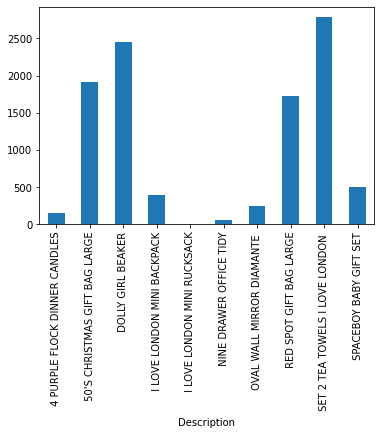

In [19]:
product_sales[:10].plot.bar()

<AxesSubplot:xlabel='Description'>

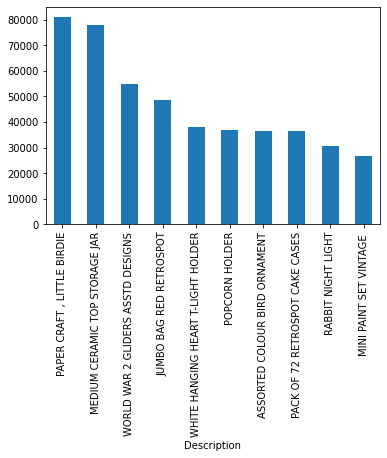

In [11]:
#the top 10 products with most quantity/ sales  
product_sales[:10].plot.bar()

In [12]:
#What is the least popular product (in total quantity/sales)?
product_sales=df.groupby('Description')['Quantity'].sum()
product_sales.sort_values(ascending=True)

Description
CAPIZ CHANDELIER                          1
CROCHET LILAC/RED BEAR KEYRING            1
ORANGE/FUSCHIA STONES NECKLACE            1
ORANGE FELT VASE + FLOWERS                1
BLUE DROP EARRINGS W BEAD CLUSTER         1
                                      ...  
WHITE HANGING HEART T-LIGHT HOLDER    37895
JUMBO BAG RED RETROSPOT               48478
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
MEDIUM CERAMIC TOP STORAGE JAR        78033
PAPER CRAFT , LITTLE BIRDIE           80995
Name: Quantity, Length: 4077, dtype: int64

In [13]:
#What is the product with the highest Revenues?
df['Revenues']=df['Quantity']*df['UnitPrice']
product_revenue= df.groupby('Description')['Revenues'].sum()
product_revenue=product_revenue.sort_values(ascending=False)
product_revenue

Description
DOTCOM POSTAGE                         206248.77
REGENCY CAKESTAND 3 TIER               174484.74
PAPER CRAFT , LITTLE BIRDIE            168469.60
WHITE HANGING HEART T-LIGHT HOLDER     106292.77
PARTY BUNTING                           99504.33
                                         ...    
allocate stock for dotcom orders ta         0.00
amazon                                      0.00
amazon adjust                               0.00
wrongly sold (22719) barcode                0.00
Adjust bad debt                        -11062.06
Name: Revenues, Length: 4077, dtype: float64

<AxesSubplot:xlabel='Description'>

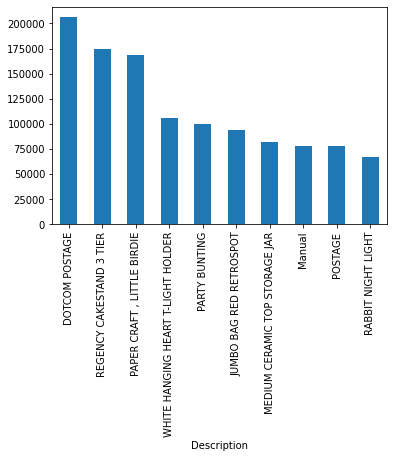

In [21]:
#the top 10 products with most revenues, bar plot
product_revenue[:10].plot.bar()

<AxesSubplot:ylabel='Revenues'>

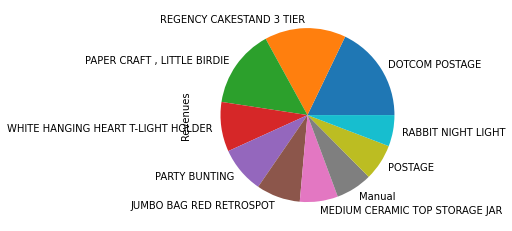

In [20]:
#the top 10 products with most revenues, pie plot
product_revenue[:10].plot.pie()

In [15]:
#What is the most redundant country ?
redundant_country=df.groupby('Country')['Country'].count()
redundant_country=redundant_country.sort_values(ascending=False)
redundant_country

Country
United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


(0.0, 10000.0)

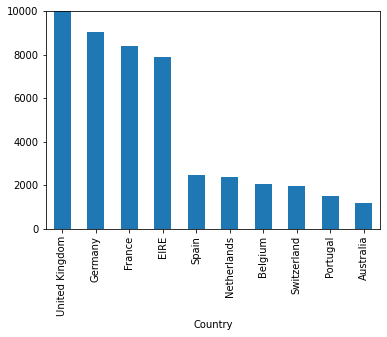

In [16]:
#top 10 countries
fiG=redundant_country[:10].plot.bar()
fiG.set_ylim(0, 10000)

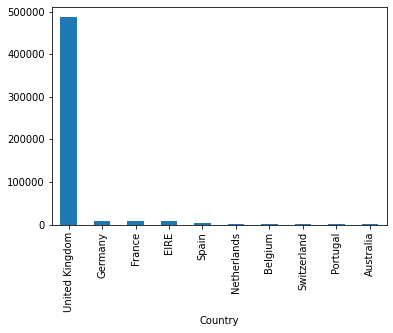

In [17]:
#top 10 countries
fiG=redundant_country[:10].plot.bar()